In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

## Load Dataset

In [2]:
file_path = "../data/raw/credit_risk_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Data Overview

In [3]:
# Shape and column info
print(f"Shape of the dataset: {df.shape}")
print(f"\nData types: \n{df.dtypes}")

Shape of the dataset: (32581, 12)

Data types: 
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [4]:
# Missing values
missing_values = df.isnull().sum()
print(f"missing_values(%)\n{round((df.isnull().sum()/len(df))*100, 2)}")

missing_values(%)
person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64


**Missing values:**

- **`loan_int_rate`** has **9.56%** missing values

- **`person_emp_length`** has **2.75%** missing values

All other features are complete.

In [5]:
# Basic statistics
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


- **Person Age:** Mean = 27.73, Min = 20, Max = 144 (potential outliers)

- **Person Income:** Wide range with a max of $6,000,000 indicating potential income outliers

- **Loan Amount:** Median = $8,000, Max = $35,000

- **Loan Interest Rate:** Mean = 11.01%, Range = 5.42% to 23.22%

- **Loan Status (Default):** 0 = Non-default, 1 = Default

## Univariate Analysis

### Loan Status Distribution

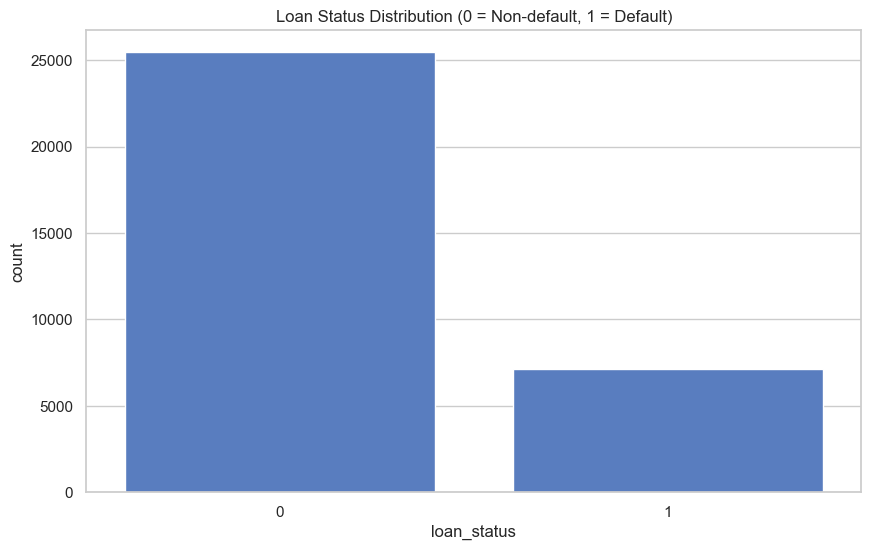

Default Rate: 21.82%


In [6]:
sns.countplot(data=df, x='loan_status')
plt.title("Loan Status Distribution (0 = Non-default, 1 = Default)")
plt.savefig("../reports/figures/Loan Status Distribution.png")
plt.show()

# Default rate
default_rate = df['loan_status'].mean()
print(f"Default Rate: {default_rate:.2%}")

- The loan status distribution indicates a moderate class imbalance

- **Non-defaulted loans (0):** 25,473

- **Defaulted loans (1):** 7,108

- **Default Rate:** 21.82%

### Age, Income, Loan Amount, Credit History

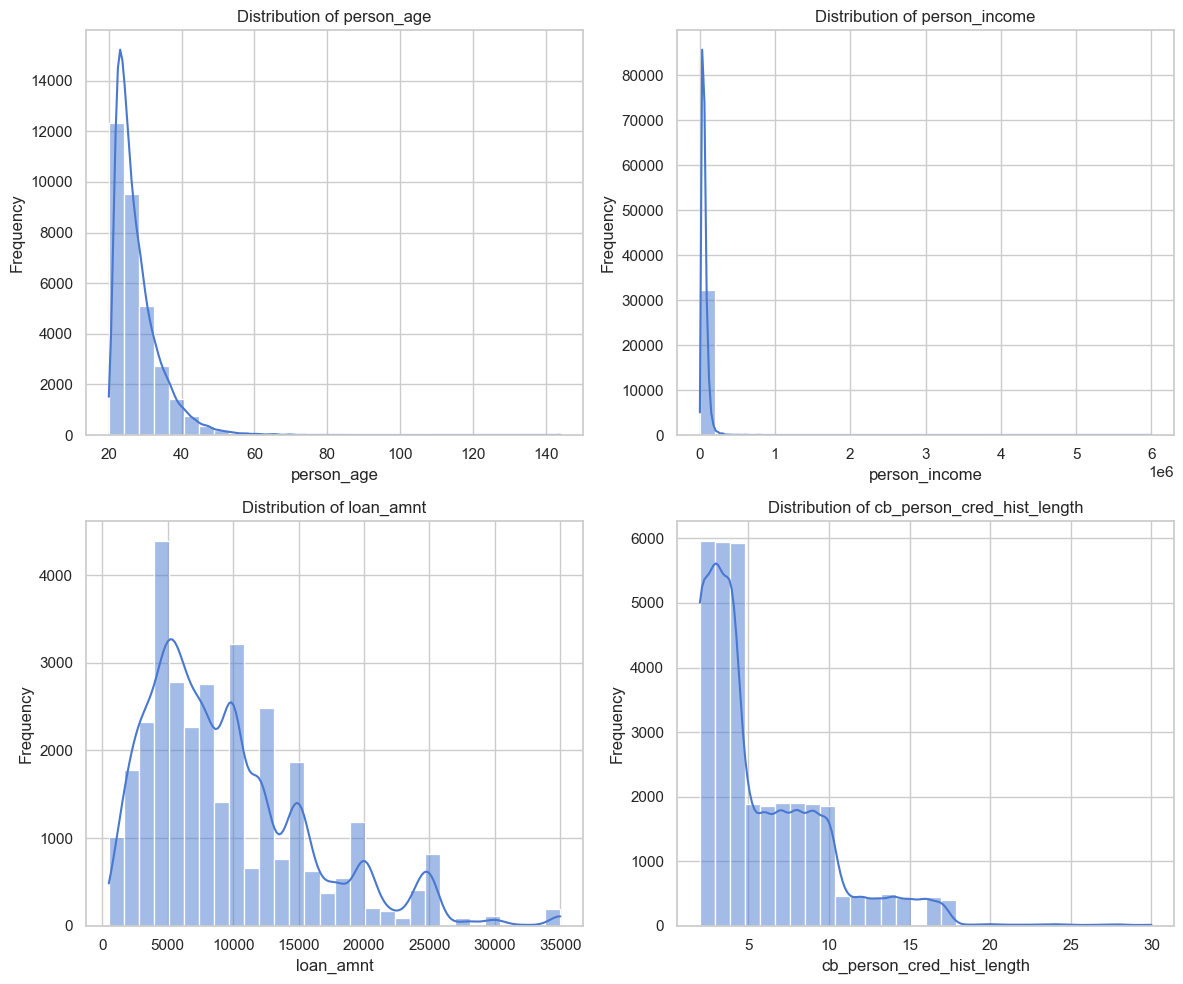

In [7]:
numerical_cols = ['person_age', 'person_income', 'loan_amnt', 'cb_person_cred_hist_length']

# Set up a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each histogram
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.savefig("../reports/figures/Age, Income, Loan Amount, Credit History.png")
plt.show()

### Categorical Features

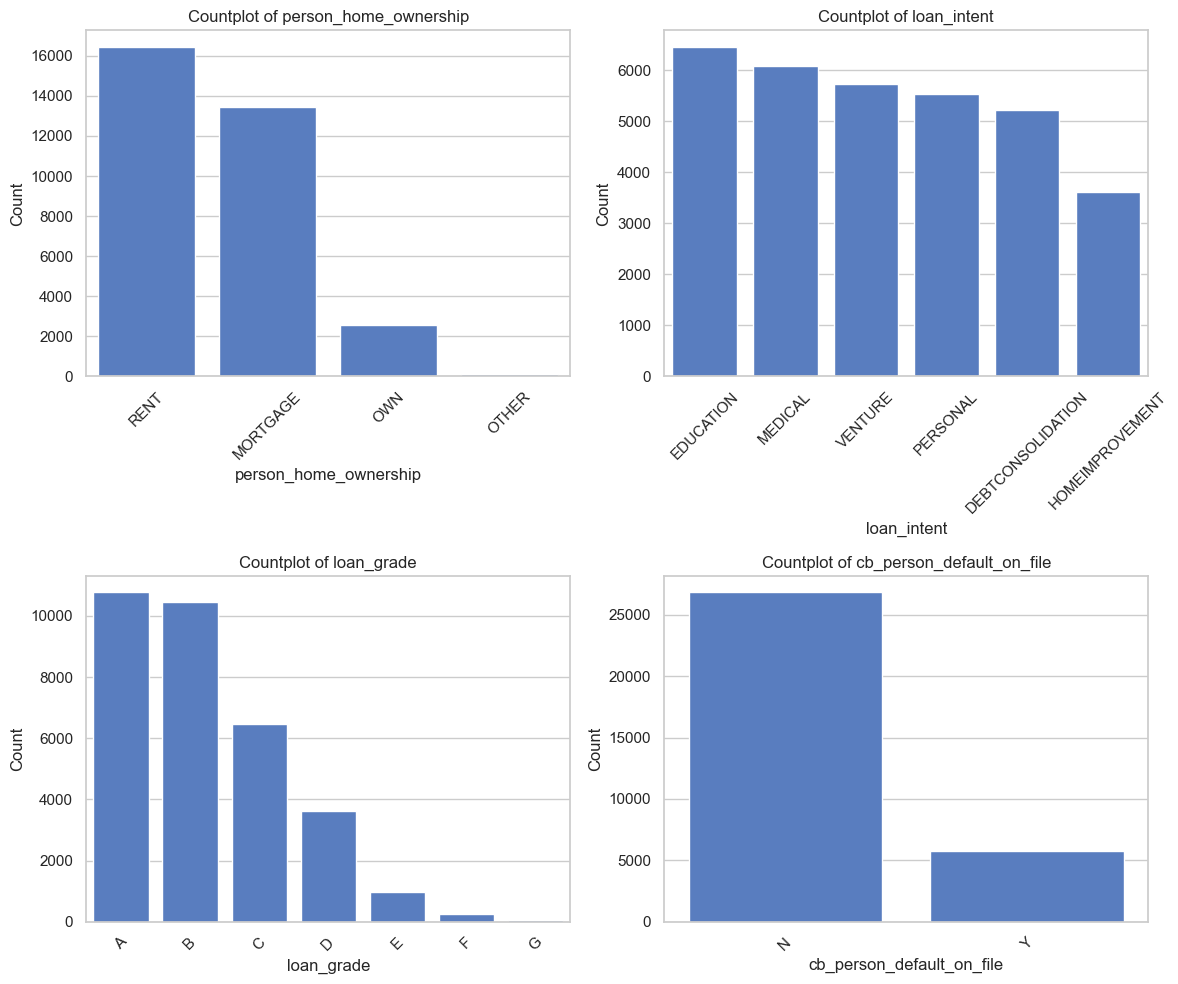

In [8]:
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 
                    'cb_person_default_on_file']

# Set up a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot each countplot in the grid
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Countplot of {col}")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.savefig("../reports/figures/Categorical Features.png")
plt.show()

- **`person_home_ownership`:** Majority of borrowers rent (16,446 = 50.5%) or are paying a mortgage (13,444 = 41.3%), which might correlate with financial flexibility or risk level.

- **`loan_intent`:** Education, medical needs, and venture funding are the top reasons for borrowing. Loans taken for debt consolidation and home improvement are less frequent but could signal different financial behavior or risk.

- **`loan_grade`:** Most loans are graded A or B, indicating relatively low-risk borrowers. Very few loans fall into high-risk categories F or G, which could have high default rates.

- **`cb_person_default_on_file`:** Around 17.6% of borrowers have previously defaulted. This is an important feature for predicting credit risk, especially when combined with current loan performance.

## Bivariate Analysis

### Loan Status by Loan Grade, Intent, and Home Ownership

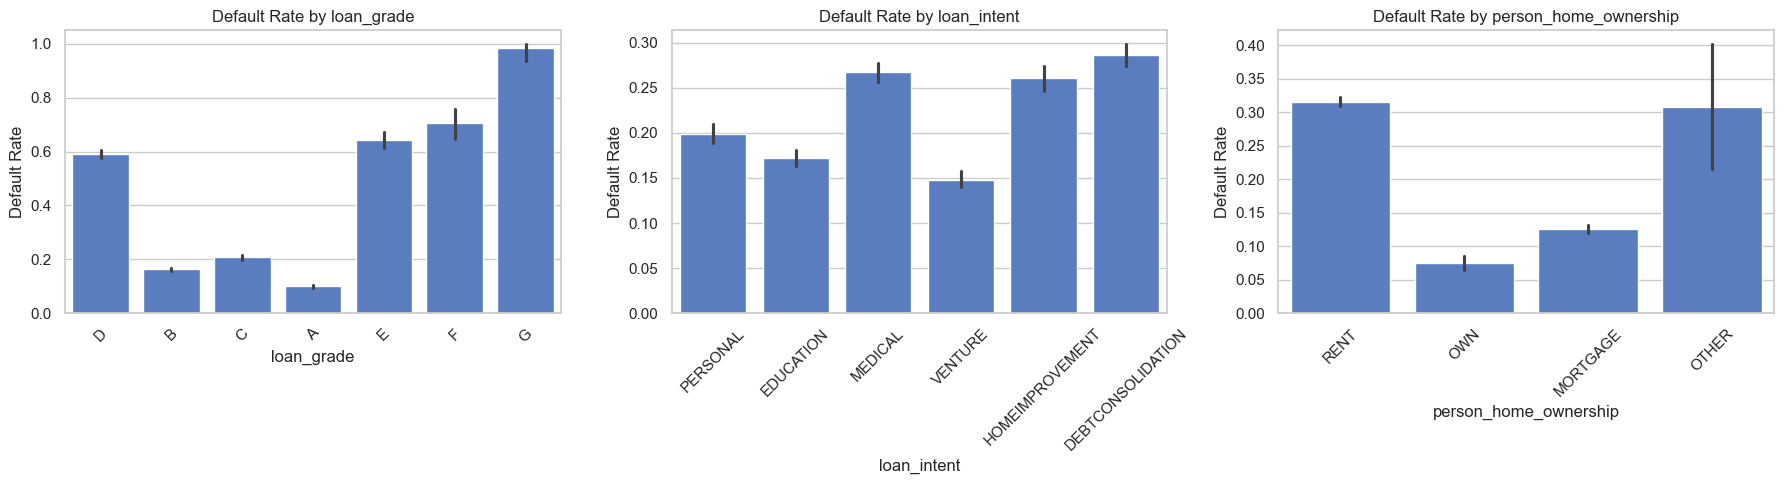

In [9]:
cols = ['loan_grade', 'loan_intent', 'person_home_ownership']

# Set up a 1x3 grid
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Wider layout for 3 plots
axes = axes.flatten()

# Create barplots
for i, col in enumerate(cols):
    sns.barplot(data=df, x=col, y='loan_status', ax=axes[i])
    axes[i].set_title(f"Default Rate by {col}")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Default Rate")

plt.tight_layout()
plt.savefig("../reports/figures/Loan Status by Loan Grade, Intent, and Home Ownership.png")
plt.show()

### **Default Rates by Category**

- **By Loan Grade:**:

    - Strong positive correlation between loan grade and default rate
    - Grade A: 9.96% default rate
    - Grade G: 98.44% default rate (extremely risky)

- **By Loan Intent:**

    - Debt Consolidation (28.59%) and Medical (26.70%) show **higher default rates**
    - Venture and Education show lower **default risks**

- **By Home Ownership:**
    - **Rent:** Borrowers who rent their homes have the highest default rate at 31.57%, indicating a potentially higher credit risk.

    - **Other:** Individuals with less common ownership types also exhibit a high default rate of 30.84%, suggesting financial instability or irregular housing situations.

    - **Mortgage:** Borrowers with a mortgage show a moderate default rate of 12.57%, which may reflect a more stable financial standing compared to renters.

    - **Own:** The lowest default rate is observed among those who own their homes outright at 7.47%, indicating the strongest financial reliability in this group.

### Boxplots of Numerical Features vs. Loan Status

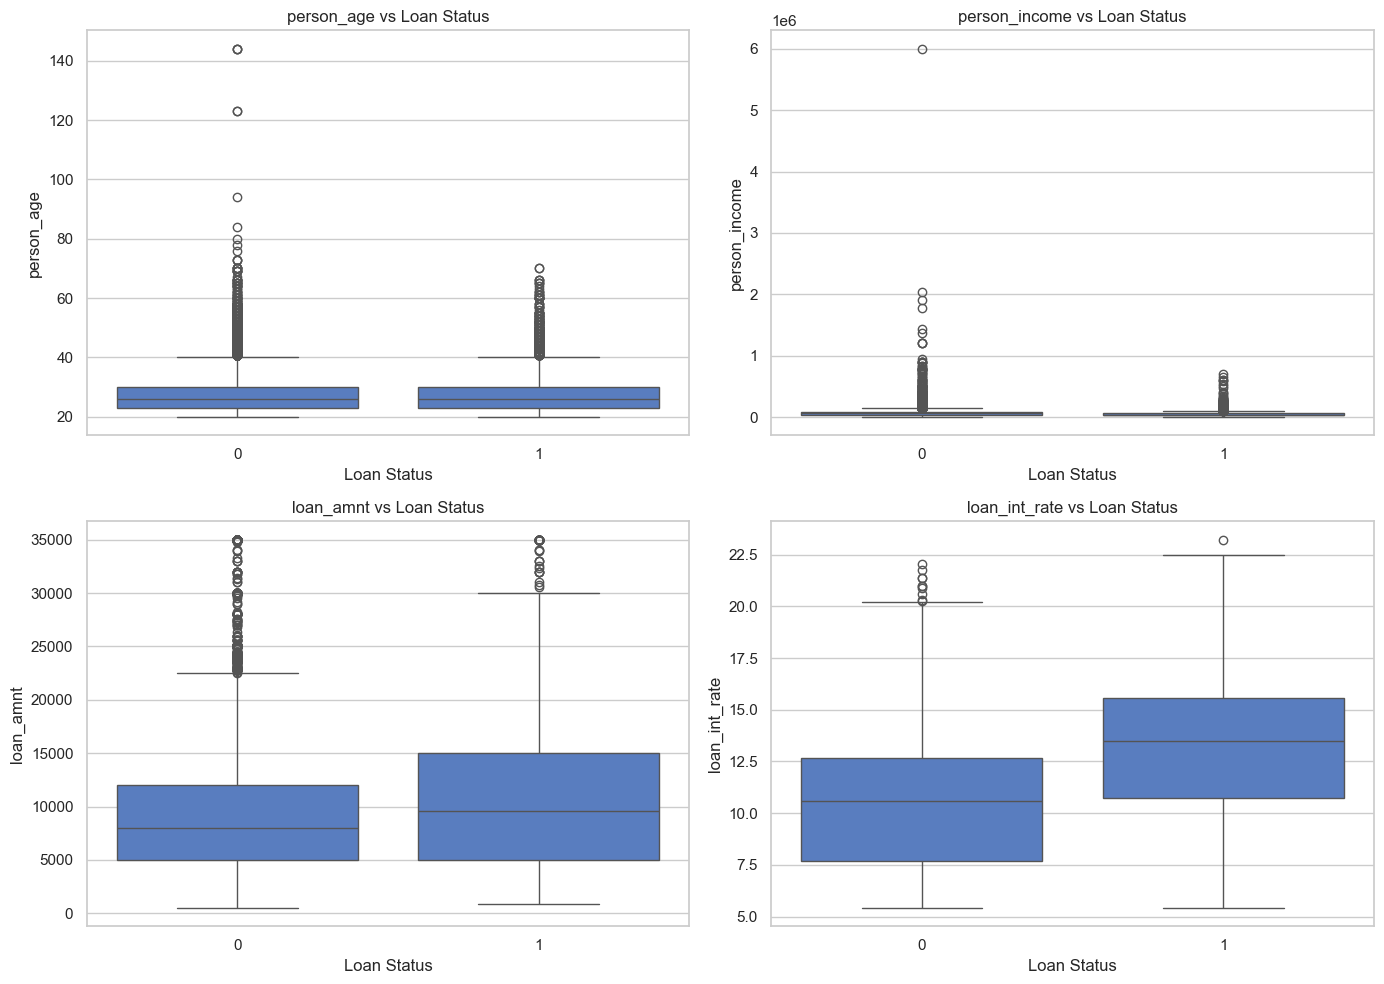

In [10]:
cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']

# Set up a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Create boxplots
for i, col in enumerate(cols):
    sns.boxplot(data=df, x='loan_status', y=col, ax=axes[i])
    axes[i].set_title(f"{col} vs Loan Status")
    axes[i].set_xlabel("Loan Status")
    axes[i].set_ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

### Correlation Matrix

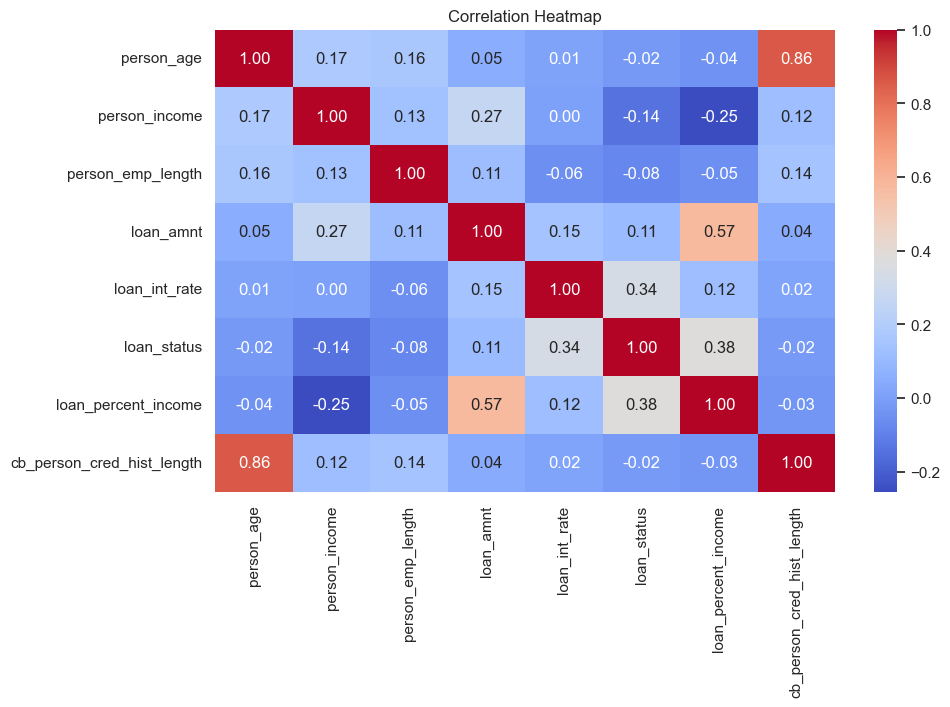

In [11]:
# Encode categorical values temporarily for correlation
df_corr = df.copy()
df_corr['loan_status'] = df_corr['loan_status'].astype(int)

# Select numeric-only for correlation
numeric_data = df_corr.select_dtypes(include=[np.number])
corr = numeric_data.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.savefig("../reports/figures/Correlation Matrix.png")
plt.show()

| Variable Pair                               | Correlation                                                                |
| ------------------------------------------- | -------------------------------------------------------------------------- |
| `loan_status` & `loan_int_rate`             | **0.34** (moderate positive correlation)                                   |
| `loan_status` & `loan_percent_income`       | **0.38** (stronger indication that high loan burden leads to default)      |
| `loan_status` & `person_income`             | **-0.14** (negative correlation – higher income, lower default likelihood) |
| `cb_person_cred_hist_length` & `person_age` | **0.86** (strong correlation)                                              |

- No multicollinearity issues observed.

## Conclusion

The exploratory data analysis provided valuable insights into the structure and patterns within the loan dataset. Key observations include:

- The **default rate** stands at **21.82%**, indicating a moderate level of class imbalance that should be addressed during modeling.

- Most borrowers are either **renting** or paying a **mortgage**, with loans predominantly intended for **education**, **medical**, and **venture** purposes.

- Loan grades are skewed toward the **lower-risk categories (A and B)**, while defaults significantly increase with higher-risk grades.

- Bivariate analysis revealed strong associations between default rates and variables like **loan grade**, **loan intent**, and **home ownership**, making them crucial predictors.

- Correlation analysis showed meaningful relationships, especially between **loan interest rate** and **loan status**, and between **loan amount** and **loan percent income**.